In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
laptop = pd.read_csv('D:\Project\FYP\laptop_data.csv')

In [172]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [173]:
laptop.shape

(1303, 12)

In [174]:
#Check dataset info
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [175]:
#Check whether theres duplication or not
laptop.duplicated().sum()

0

In [176]:
#Find null values
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [177]:
#drop column 0 cs not been used
laptop.drop(columns=['Unnamed: 0'],inplace=True)

In [178]:
#Convert Old Price(INR) to New Price(MYR) 
laptop['Price_MYR'] = round((laptop['Price']/18.7278).astype('float'),2)
laptop.drop(columns='Price',inplace=True)

In [179]:
#Remove string inside Ram and Weight and convert it to Integer/Float
laptop['Ram'] = laptop['Ram'].str.replace('GB','').astype('int32')
laptop['Weight'] = laptop['Weight'].str.replace('kg','').astype('float32')

In [180]:
#Display Again to See the new column
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19


In [181]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_MYR         1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [182]:
import seaborn as sns

C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\752023541.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price_MYR'])


<AxesSubplot: xlabel='Price_MYR', ylabel='Density'>

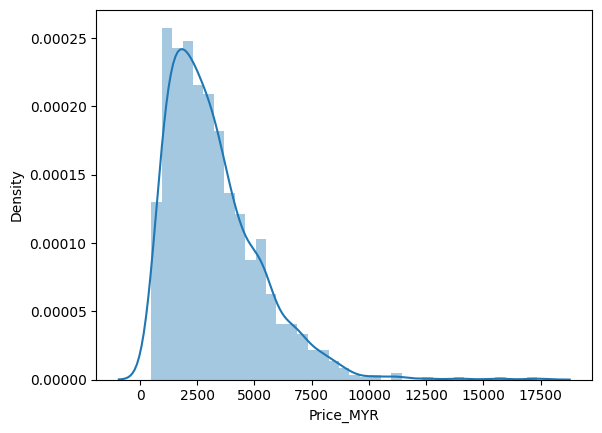

In [183]:
import seaborn as sns

sns.distplot(laptop['Price_MYR'])

<AxesSubplot: >

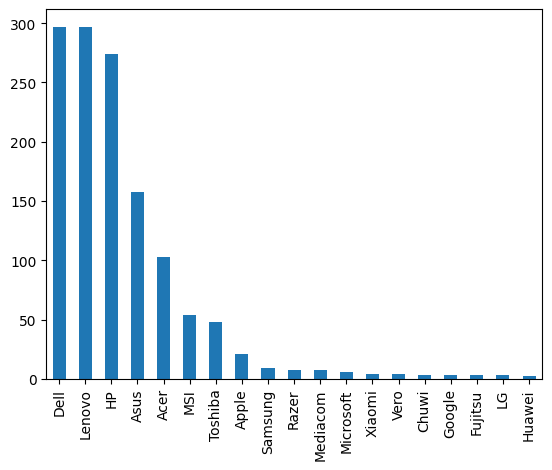

In [111]:
laptop['Company'].value_counts().plot(kind='bar')

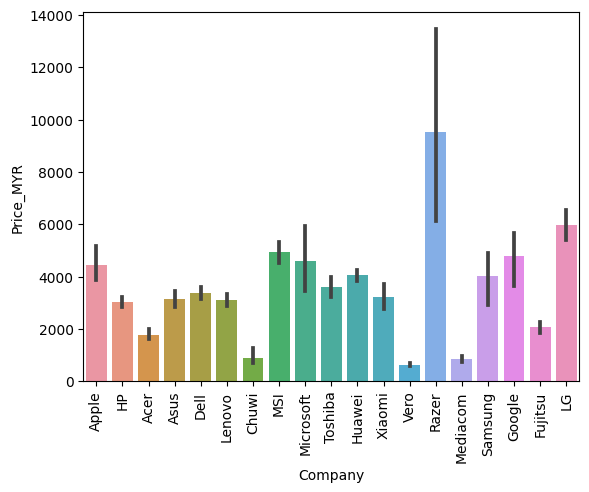

In [112]:
sns.barplot(x=laptop['Company'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

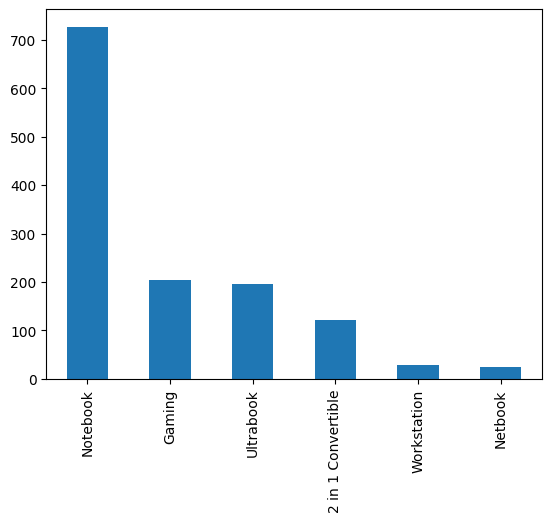

In [113]:
laptop['TypeName'].value_counts().plot(kind='bar')

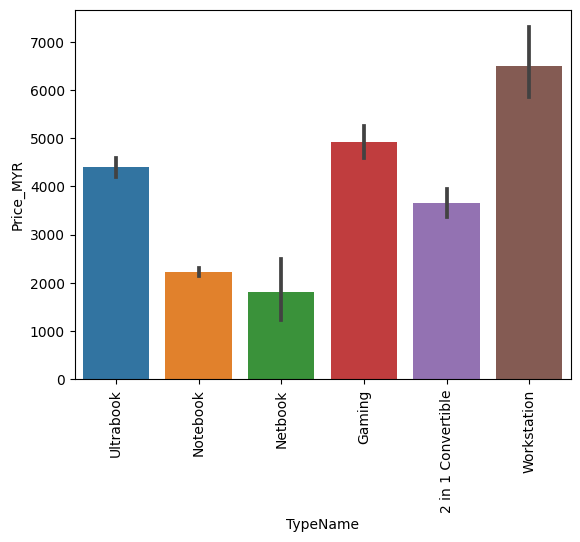

In [115]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\1907260551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Inches'])


<AxesSubplot: xlabel='Inches', ylabel='Density'>

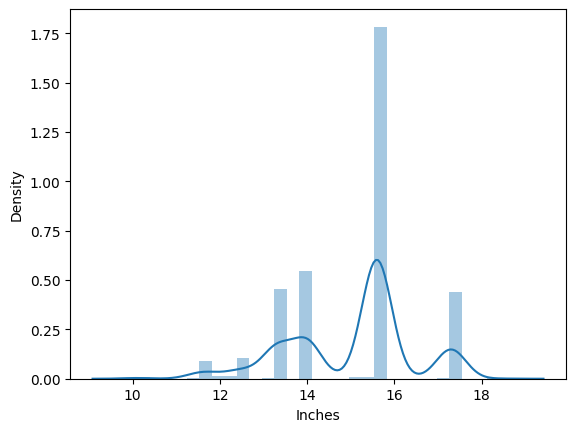

In [116]:
sns.distplot(laptop['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price_MYR'>

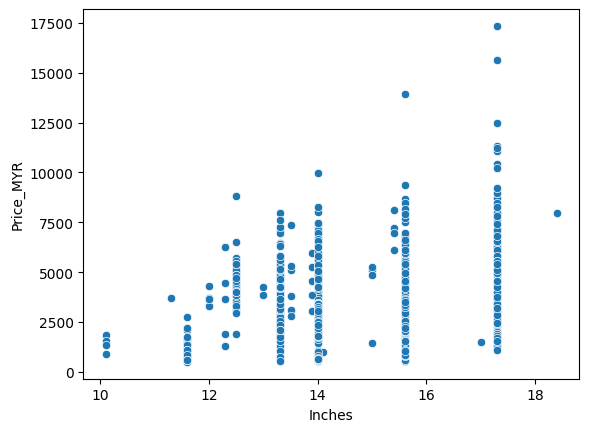

In [117]:
sns.scatterplot(x=laptop['Inches'],y=laptop['Price_MYR'])

In [118]:
laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [184]:
#Create a new column as below for non touchscreen or touchscreen
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#To break into IPS or no IPS
laptop['Ips'] = laptop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [185]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1


<AxesSubplot: >

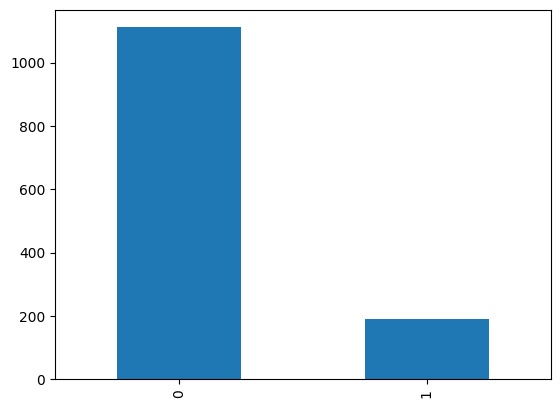

In [121]:
#Count how many touchscreen and non touchscreen
laptop['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Touchscreen', ylabel='Price_MYR'>

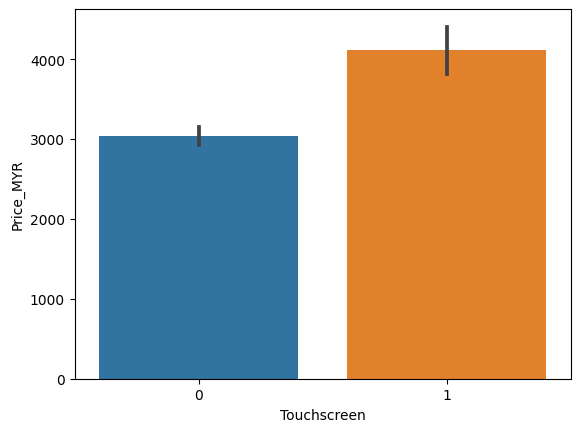

In [122]:
#Relationship between price and touchscreen laptop
sns.barplot(x=laptop['Touchscreen'],y=laptop['Price_MYR'])

<AxesSubplot: >

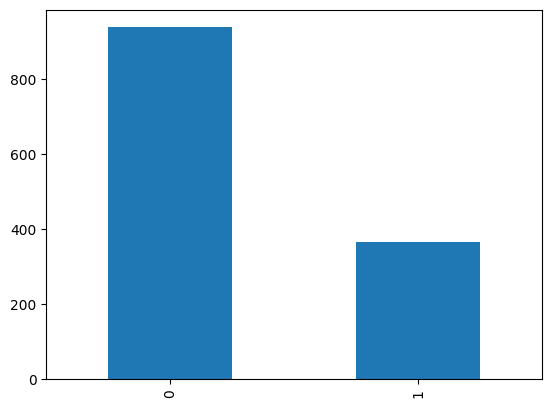

In [123]:
laptop['Ips'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Ips', ylabel='Price_MYR'>

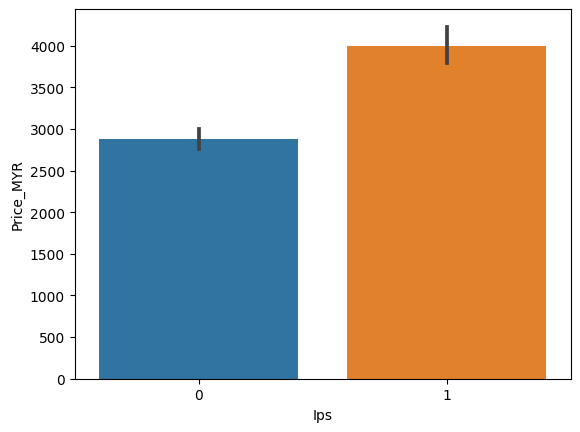

In [124]:
sns.barplot(x=laptop['Ips'],y=laptop['Price_MYR'])

In [186]:
#Split ScreenResolution into 2 types using split after/before 'x' 
new = laptop['ScreenResolution'].str.split('x', expand=True)

laptop['X_res'] = new[0]
laptop['Y_res'] = new[1]

In [126]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,X_res,Y_res
422,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31,4059.77,0,0,Full HD 1920,1080
334,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,2842.12,0,0,Full HD 1920,1080
773,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,3126.62,0,0,Full HD 1920,1080
343,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.40,5971.59,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
659,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,8954.17,0,1,IPS Panel 4K Ultra HD 3840,2160


In [187]:
#Remove all string in X_res
laptop['X_res'] = laptop['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [188]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,2560,1600


In [189]:
#Convert x and y into integer
laptop['X_res'] = laptop['X_res'].astype('int')
laptop['Y_res'] = laptop['Y_res'].astype('int')

In [190]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_MYR         1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [191]:
laptop.corr()['Price_MYR']

C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\3398650711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptop.corr()['Price_MYR']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_MYR      1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_MYR, dtype: float64

In [192]:
#Pixels Per Inch (PPI) 
#laptop['ppi'] = (((laptop['X_res']**2) + (laptop['Y_res']**2))**0.5/laptop['Inches']).astype('float')
laptop['ppi'] = (np.sqrt((laptop['X_res']**2) + (laptop['Y_res']**2))/laptop['Inches']).astype('float')
0.473487

0.473487

In [133]:
laptop.corr()['Price_MYR']

C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\3398650711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptop.corr()['Price_MYR']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_MYR      1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_MYR, dtype: float64

In [194]:
laptop.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)


In [195]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005


In [136]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005


In [196]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [197]:
#Extract Type of CPU GHz
laptop ['CPU GHz'] = laptop['Cpu'].str.split('\s').str[-1]
#Remove GHz
laptop['CPU GHz'] = laptop['CPU GHz'].str.replace('GHz','').astype('float32')

In [198]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005,3.1


In [140]:
#count value of Ghz
laptop['CPU GHz'].value_counts()

2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: CPU GHz, dtype: int64

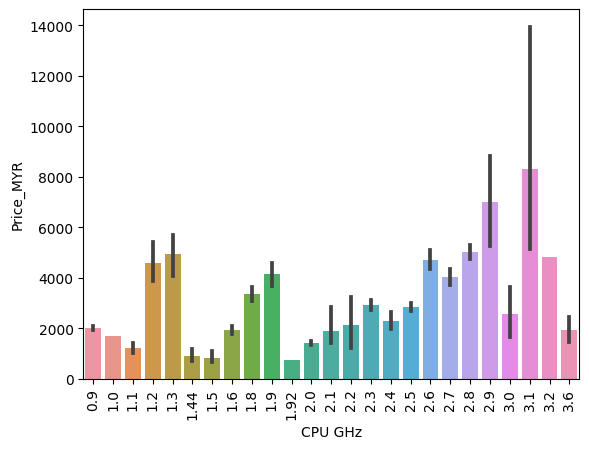

In [214]:
#Correlation Between Ghz and Price
#sns.barplot(x=laptop['CPU GHz'],y=laptop['Price_MYR'])

sns.barplot(x=laptop['CPU GHz'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

# laptop['CPU GHz'].value_counts().plot(kind='pie')

In [199]:
laptop['CPU Name'] = laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [200]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [202]:
laptop['Cpu brand'] = laptop['CPU Name'].apply(fetch_processor)

In [203]:
laptop.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,CPU Name,Cpu brand
1091,HP,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,984.33,0,0,100.454670,2.00,Intel Core i3,Intel Core i3
212,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,992.89,0,0,141.211998,2.00,Intel Core i3,Intel Core i3
81,Apple,Ultrabook,Intel Core i5 1.3GHz,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,4295.90,0,1,226.415547,1.30,Intel Core i5,Intel Core i5
429,Mediacom,2 in 1 Convertible,Intel Celeron Dual Core N3350 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.16,850.65,1,1,189.905791,1.10,Intel Celeron Dual,Other Intel Processor
248,HP,Notebook,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,1920.35,0,1,165.632118,1.60,Intel Core i5,Intel Core i5
202,Acer,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,2110.97,0,0,141.211998,2.70,Intel Core i7,Intel Core i7
1120,Vero,Notebook,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,557.61,0,0,165.632118,1.44,Intel Atom X5-Z8350,Other Intel Processor
111,Dell,Ultrabook,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,3923.21,1,0,276.053530,2.40,Intel Core i7,Intel Core i7
914,Acer,Notebook,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,1419.64,0,0,141.211998,2.40,Intel Core i3,Intel Core i3
1286,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,651.50,0,0,111.935204,1.60,Intel Celeron Dual,Other Intel Processor


In [146]:
laptop['Cpu brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu brand, dtype: int64

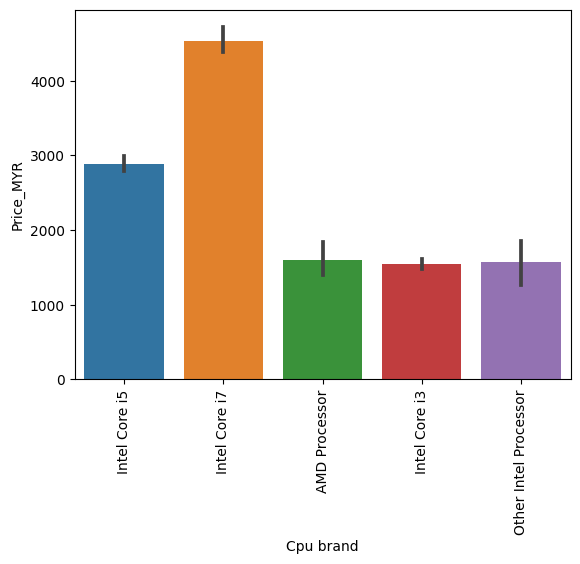

In [147]:
sns.barplot(x=laptop['Cpu brand'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

In [205]:
laptop.drop(columns=['Cpu','CPU Name'],inplace=True)

In [206]:
laptop.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand
119,Asus,Notebook,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.700,3180.67,0,0,141.211998,1.8,Intel Core i7
1244,HP,Notebook,4,256GB SSD,Intel HD Graphics 520,Windows 7,1.540,3129.44,0,0,157.350512,2.3,Intel Core i5
779,Asus,Notebook,8,128GB SSD,Intel HD Graphics 505,Windows 10,2.000,1655.49,0,0,141.211998,1.1,Other Intel Processor
530,Dell,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.420,8571.24,0,1,127.335675,2.8,Intel Core i7
345,Lenovo,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.400,3211.97,0,1,141.211998,2.8,Intel Core i7
1213,Dell,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.191,2842.12,1,1,141.211998,2.5,Intel Core i5
715,Lenovo,Notebook,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.870,2438.34,0,1,157.350512,2.5,Intel Core i5
1163,Lenovo,Notebook,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.200,1305.84,0,0,100.454670,2.0,Intel Core i3
932,HP,Notebook,4,1TB HDD,Intel HD Graphics 400,No OS,1.860,821.91,0,0,100.454670,1.6,Other Intel Processor
23,Dell,2 in 1 Convertible,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.620,2330.03,1,0,165.632118,1.6,Intel Core i5


<AxesSubplot: >

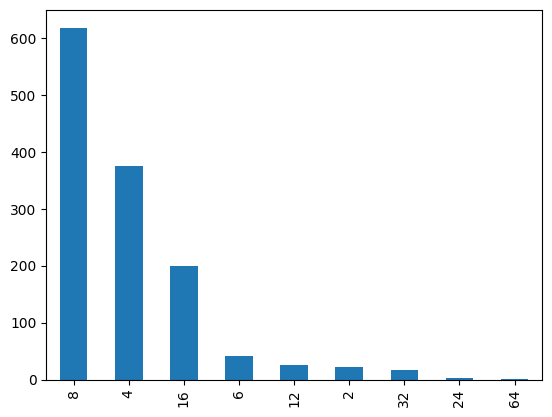

In [150]:
laptop['Ram'].value_counts().plot(kind='bar')

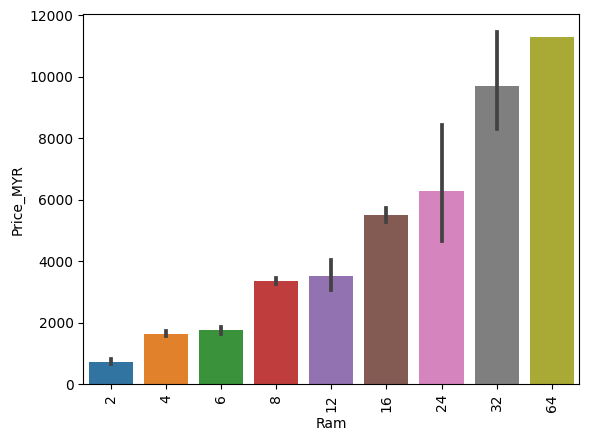

In [151]:
sns.barplot(x=laptop['Ram'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
laptop['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [165]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new = laptop["Memory"].str.split("+", n = 1, expand = True)

laptop["first"]= new[0]
laptop["first"]= laptop["first"].str.strip()

laptop["second"]= new[1]

laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['first'] = laptop['first'].str.replace(r'\D', '')

laptop["second"].fillna("0", inplace = True)

laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['second'] = laptop['second'].str.replace(r'\D', '')

laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\4004857266.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['first'] = laptop['first'].str.replace(r'\D', '')
C:\Users\hasbu\AppData\Local\Temp\ipykernel_10144\4004857266.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['second'] = laptop['second'].str.replace(r'\D', '')


In [169]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256,0,0


In [62]:
laptop.drop(columns=['Memory'],inplace=True)

In [63]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256,0,0


In [64]:
laptop.corr()['Price_MYR']

C:\Users\hasbu\AppData\Local\Temp\ipykernel_2464\3398650711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptop.corr()['Price_MYR']


Ram              0.743007
Weight           0.210370
Price_MYR        1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
CPU GHz          0.430293
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_MYR, dtype: float64

In [65]:
laptop.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [66]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256


In [67]:
laptop['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [68]:
laptop['GPU Brand'] = laptop['Gpu'].apply(lambda x:x.split()[0])

In [69]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256,Intel


<AxesSubplot: >

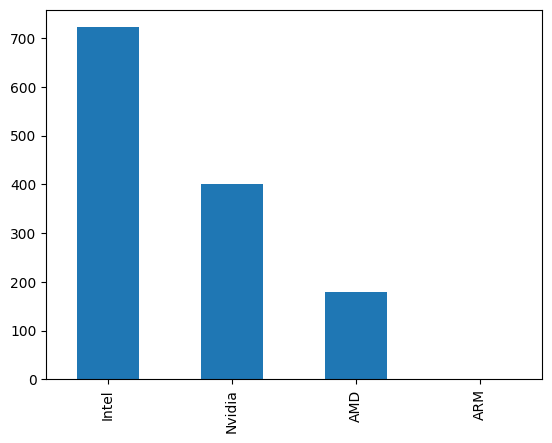

In [70]:
laptop['GPU Brand'].value_counts().plot(kind='bar')

In [71]:
laptop = laptop[laptop['GPU Brand'] != 'ARM']

In [72]:
laptop['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

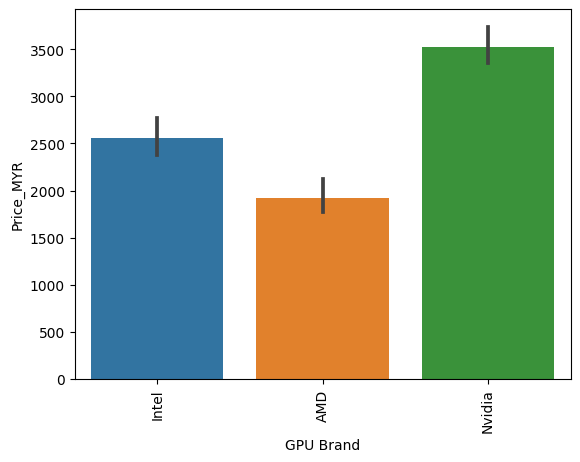

In [73]:
sns.barplot(x=laptop['GPU Brand'],y=laptop['Price_MYR'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
laptop.drop(columns=['Gpu'],inplace=True)

In [75]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256,Intel


In [76]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

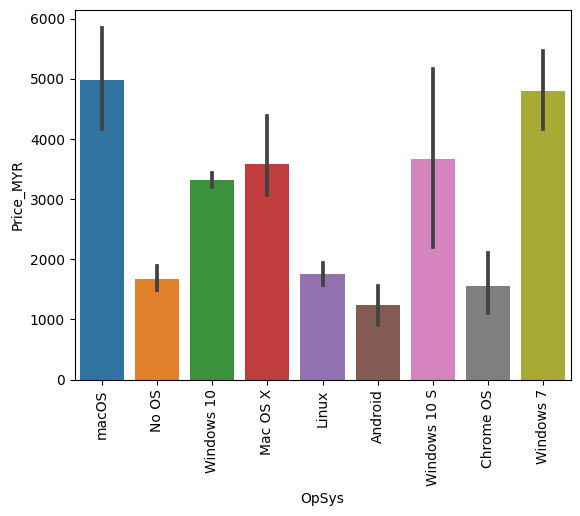

In [77]:
sns.barplot(x=laptop['OpSys'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [79]:
laptop['Operating System'] = laptop['OpSys'].apply(cat_os)

In [80]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price_MYR,Touchscreen,Ips,ppi,CPU GHz,Cpu brand,HDD,SSD,GPU Brand,Operating System
0,Apple,Ultrabook,8,macOS,1.37,3811.38,0,1,226.983005,2.3,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,2557.46,0,0,127.677940,1.8,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,1635.86,0,0,141.211998,2.5,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,7218.97,0,1,220.534624,2.7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,5131.19,0,1,226.983005,3.1,Intel Core i5,0,256,Intel,Mac


In [81]:
laptop.drop(columns=['OpSys'],inplace=True)

In [82]:
laptop['Operating System'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: Operating System, dtype: int64

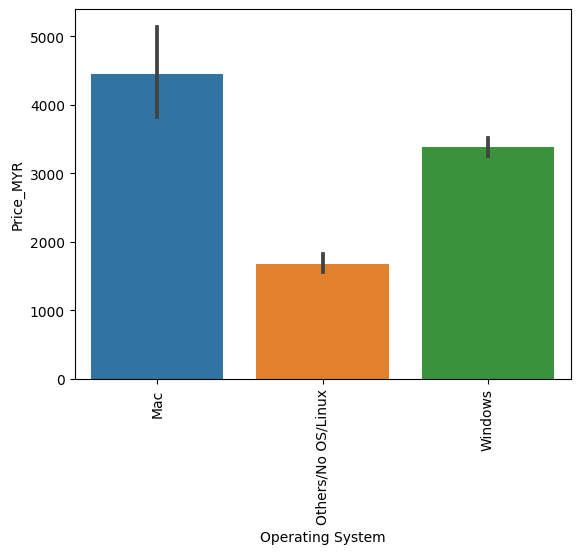

In [83]:
sns.barplot(x=laptop['Operating System'],y=laptop['Price_MYR'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\hasbu\AppData\Local\Temp\ipykernel_2464\2547187844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

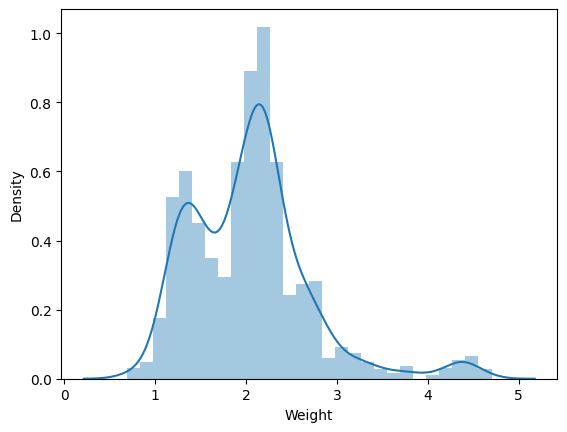

In [84]:
sns.distplot(laptop['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price_MYR'>

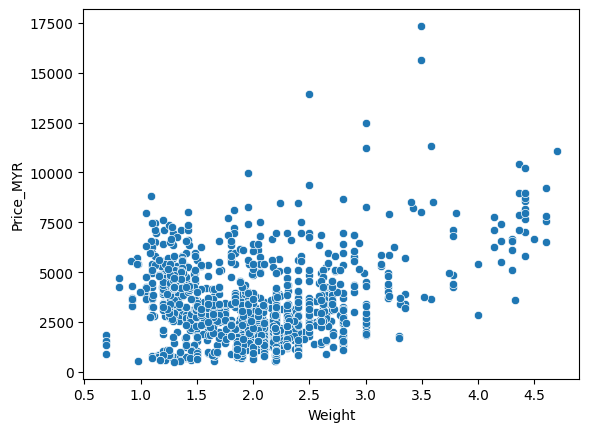

In [85]:
sns.scatterplot(x=laptop['Weight'],y=laptop['Price_MYR'])

In [86]:
laptop.corr()['Price_MYR']

C:\Users\hasbu\AppData\Local\Temp\ipykernel_2464\3398650711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptop.corr()['Price_MYR']


Ram            0.742905
Weight         0.209867
Price_MYR      1.000000
Touchscreen    0.192917
Ips            0.253319
ppi            0.475368
CPU GHz        0.430122
HDD           -0.096891
SSD            0.670660
Name: Price_MYR, dtype: float64

C:\Users\hasbu\AppData\Local\Temp\ipykernel_2464\460230517.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptop.corr())


<AxesSubplot: >

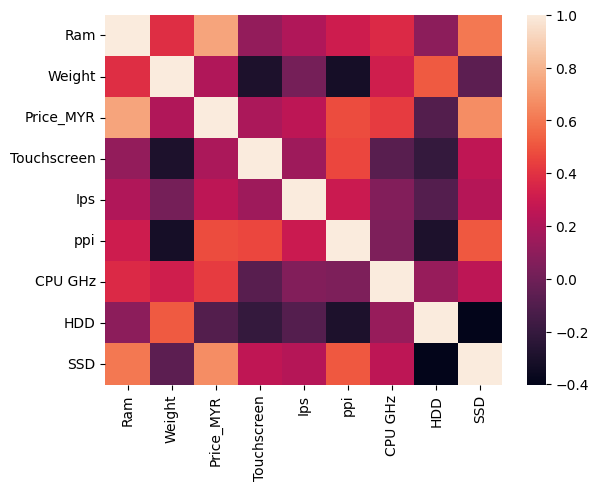

In [87]:
sns.heatmap(laptop.corr())

C:\Users\hasbu\AppData\Local\Temp\ipykernel_2464\1612640745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price_MYR']))


<AxesSubplot: xlabel='Price_MYR', ylabel='Density'>

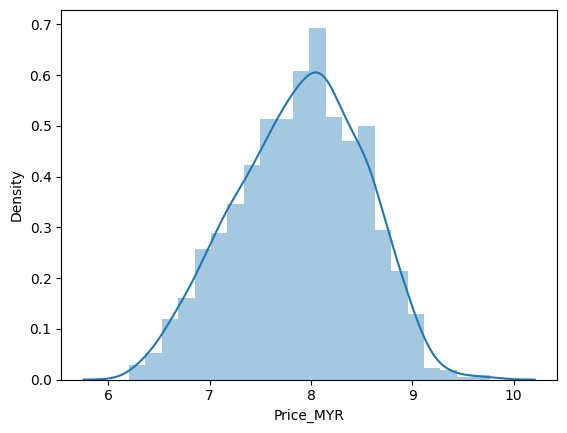

In [88]:
sns.distplot(np.log(laptop['Price_MYR']))

In [89]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Ram               1302 non-null   int32  
 3   Weight            1302 non-null   float32
 4   Price_MYR         1302 non-null   float64
 5   Touchscreen       1302 non-null   int64  
 6   Ips               1302 non-null   int64  
 7   ppi               1302 non-null   float64
 8   CPU GHz           1302 non-null   float32
 9   Cpu brand         1302 non-null   object 
 10  HDD               1302 non-null   int64  
 11  SSD               1302 non-null   int64  
 12  GPU Brand         1302 non-null   object 
 13  Operating System  1302 non-null   object 
dtypes: float32(2), float64(2), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


### Exporting the Model

In [157]:
#Export cleaned dataset
import pickle

pickle.dump(laptop,open('Cleaned_Laptop_Data.pkl','wb'))
#pickle.dump(pipe,open('pipe.pkl','wb'))

In [158]:
#Converting from pkl file to csv file
import pickle as pkl

with open('Cleaned_Laptop_Data.pkl', "rb") as f:
    object = pkl.load(f)

df = pd.DataFrame(object)
df.to_csv(r'Cleaned_Laptop_Dataset.csv')